In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt

Mikä voisi ollakaan hauskempaa kuin ennustaa seuraavan viikon lottonumerot, joten...

In [2]:
series = [7,16,18,29,35,37,38,1,22,23,27,28,37,38,13,16,19,22,26,27,36,10,11,12,25,29,30,39,1,8,9,13,16,20,30]
lotto=pd.DataFrame(series)
lotto.columns=["Numerot"]
lotto

,Numerot
0,7
1,16
2,18
3,29
4,35
5,37
6,38
7,1
8,22
9,23


Otetaan muutaman edellisen viikon numerot, jotta saadaan hieman pohjaa opetukseen. Sitten vain annetaan algoritmin päätellä seuraavan viikon numerot.

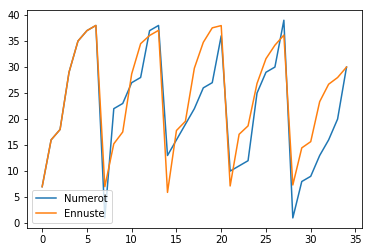

In [3]:
fit1 = ExponentialSmoothing(lotto["Numerot"], seasonal_periods=7, trend="add", seasonal="mul").fit()
lotto["Ennuste"]=fit1.fittedvalues
lotto.plot()

In [8]:
sqrt(mean_squared_error(lotto["Numerot"],lotto["Ennuste"]))

5.350767782259442

35     5.0
36    11.0
37    13.0
38    19.0
39    22.0
40    24.0
41    28.0
Name: Ennuste, dtype: float64

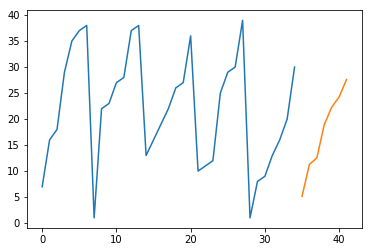

In [4]:
lottop=pd.DataFrame(fit1.forecast(7))
lottop.columns=["Ennuste"]
lotto["Numerot"].plot()
lottop["Ennuste"].plot()
lottop["Ennuste"].round()

Ja koska lotossa käytetään vain kokonaislukuja, niin tulokset tuli pyöristää. Näillä numeroilla sitten vain lottoamaan!